# Train a Tissue Classifier on GTEx

This notebook trains a tissue classifer, step-by-step, resulting in a saved model that can be reused for solving similar problems[1]. The steps outlined are:
* retrieve the GTEx data
* transform the data
* train and save the model
Alternatively, download the weights from this repo to avoid the computational expense of training.

Note: to reuse the weights, take care that the new dataset's features/genes are identical to the trained model described here. To use a different gene set, adjust the preprocessing step below to match the desired gene set. 

## Build the gtex dataset file for tensorflow

The following command prepares the dataset to be used with `tfds.load("gtex")`.

The Gtex dataset class will retrieve the data, preprocess, and save the gene matrix. The GTEx data are retrieved from storage.googleapis.com and may "time out" several times before connecting to a viable google server. Plan accordingly and be patient, it may take 30-60 minutes or so, depending on how quickly you estable a connection with the server and internet bandwidth.

Next, the Gtex dataset class will read in the counts and annotations, read entrez gene id annotations directly from cognoma, and then wrangle the data into a format appropriate for the classification model. If training a model for a different geneset, please refer to the code in `sbr/datasets/structured/gtex.py` for details on how the data are processed and make changes accordingly.

In [1]:
# This is now done with the tfds build command ! ./get_gtex.sh
! tfds build --register_checksums --overwrite sbr/datasets/structured/gtex

2022-08-24 03:56:24.179480: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-24 03:56:24.286587: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-24 03:56:24.287182: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
INFO[build.py]: Loading dataset sbr/datasets/structured/gtex from path: /home/krobasky/toys/tiscla/src/sbr/datasets/structured/gtex.py
+++++++++INFO CALLED
INFO[dataset_info.py]: Load dataset info from /home/krobasky/tensorflow_datasets/gtex/1.0.2
WARNING[dataset_builder.py]: Found a different version of the requested datas

+ Reading entrez annotations from /home/krobasky/tensorflow_datasets/downloads/raw.github.com_cognom_genes_ad9631_genesC-t3T3XgdQTdvzdSCxtw_vOx6iywKupzDL6LUlZof6k.tsv...
+ Reading old-to-new annotations from /home/krobasky/tensorflow_datasets/downloads/raw.github.com_cognom_genes_ad9631_updateBdfRXItjuRvKX9Bi_8niJx5O_4kBxTOHOY7Dt94c4tY.tsv...
+ Reading gene expression - this takes a little while
+ Get GTEx gene mapping
+ Perform inner merge gene df to get new gene id mapping
+ *Drop 'Name' column...
+ *Drop any rows with 'na's...
+ * Use groupby to collapse duplicate genes by median (199 genes are duplicated, some more than twice, for a total of 1608 values) ...
+ *reindex map...
+ *rename...
+ *rename again...
+ *transpose...
+ *sort by row...
+ *sort by columns...
+ rename index
+ save expression as a feather-formatted file
+ Write out gene ids in order (data/gtex/gene_ids.txt)
++ Change attr tissue type names to something directory-friendly
/home/krobasky/toys/tiscla/src/sbr/dataset

## Train the model
Run the following command to train the tissue classifier on GTEx data, perform rudimentary performance evaluation, and save the architecture and weights. As configured, the model will drop any tissues without at least 100 samples, and will only train on 200*(tissue classes) samples. Please refer to the code to make appropriate modifications as desired.

Best to run this on a GPU. Google Colab is a good choice, sans access to an on-premisis GPU server.

In [2]:
! python gtex-train.py

+++++++++INFO CALLED
2022-08-24 03:56:36.749493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-24 03:56:36.773360: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-24 03:56:36.774340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-24 03:56:36.774718: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other oper

[sbr.model.save_architecture] Model successfully saved at: data/model/gtex/manual/gtex_model.h5.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_BAD (BADBlock)         (None, 1000)              110000    
_________________________________________________________________
output (Dense)               (None, 30)                30030     
Total params: 140,030
Trainable params: 138,030
Non-trainable params: 2,000
_________________________________________________________________
Done.


Look at the loss curve that was output to file by the training pipeline. Accuracy (orange) should swiftly increase with each epoch and remain high while loss should swiftly decrease and remain low.

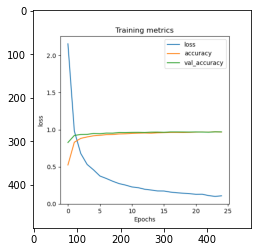

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("data/images/nn-loss-curve.png")
plt.imshow(img);

# Confusion Matrix

## Load the data

In [5]:
###
# Get the dataset
###
from sbr.preprocessing import gtex
[class_names,
 x_train, y_train, x_validation, y_validation, x_test,y_test] = gtex.dataset_setup(sample_count_threshold=500,
                                                                                   test_fraction = 0.1,
                                                                                   validation_fraction = 0.1,
                                                                                   verbose = True,
                                                                                   batch_size = 32,
                                                                                   seed = None)


+++++++++INFO CALLED


2022-08-24 03:59:06.809652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-24 03:59:06.836245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-24 03:59:06.837015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-24 03:59:06.838877: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild Tenso

too few: Vagina(156)
too few: Liver(226)
too few: Salivary_Gland(162)
too few: Pancreas(328)
too few: Cervix_Uteri(19)
too few: Prostate(245)
too few: Ovary(180)
too few: Pituitary(283)
too few: Small_Intestine(187)
too few: Fallopian_Tube(9)
too few: Adrenal_Gland(258)
too few: Spleen(241)
too few: Stomach(359)
too few: Testis(361)
too few: Uterus(142)
too few: Kidney(89)
too few: Bladder(21)
too few: Breast(459)
Counts per class:
(total number of samples, total number of genes) = 
(17382, 105)
[ 0] Colon       	 779 samples
[ 1] Heart       	 861 samples
[ 2] Blood       	 929 samples
[ 3] Thyroid     	 653 samples
[ 4] Skin        	1809 samples
[ 5] Nerve       	 619 samples
[ 6] Adipose_Tissue	1204 samples
[ 7] Muscle      	 803 samples
[ 8] Blood_Vessel	1335 samples
[ 9] Lung        	 578 samples
[10] Esophagus   	1445 samples
[11] Brain       	2642 samples

Total remaining samples after subsampling= 15000


## Load the model
Load the model and data to print the confusion matrix. This is for the fully dataset, 17k+ samples, and includes the 2600 training subsample. However, the confusion matrix for the 260 test data looks similar. To see just the test data that was parsed out from the training subsample, load the gtex-train.sh one step at a time into the notebook, then call plot_cm with y_test. The memory on this computer is limited, so only 10k of the 17k+ samples are included in the confusion matrix.

In [6]:
from keras.models import load_model
from sbr.layers import BADBlock
savedModel = load_model('data/model/gtex/manual/gtex_model.h5', custom_objects={'BADBlock': BADBlock})
print("Saved model summary:")
savedModel.summary()

Saved model summary:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_BAD (BADBlock)         (None, 1000)              110000    
_________________________________________________________________
output (Dense)               (None, 30)                30030     
Total params: 140,030
Trainable params: 138,030
Non-trainable params: 2,000
_________________________________________________________________


In [7]:
y_pred = savedModel.predict(x_train[0:10000])

2022-08-24 03:59:12.027152: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


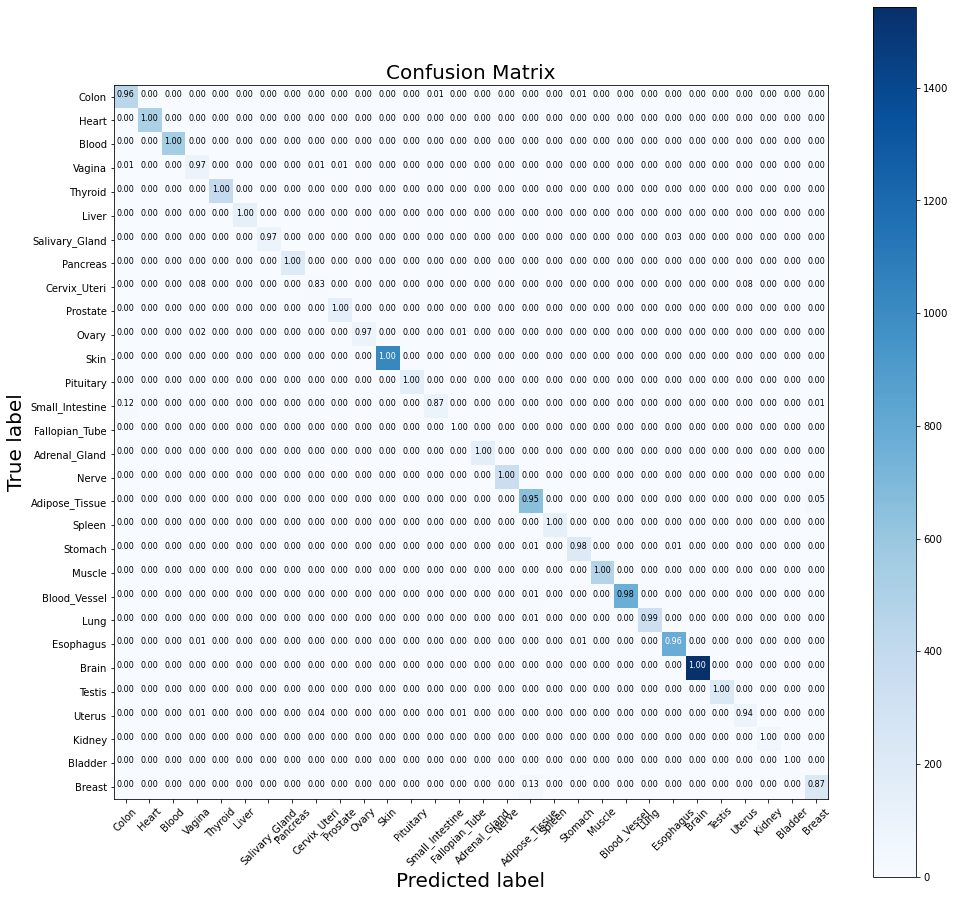

In [8]:
import numpy as np
from sbr.visualize import plot_cm
plot_cm(y_test=np.argmax(y_train[0:10000], axis=1), # ground truth test labels
                          y_pred=np.argmax(y_pred, axis=1), # predicted labels
                          classes=list(class_names), # array of class label names
                          figsize=(16, 16),
                          textsize=8)

The color of each cell indicates how many samples (support) are included in the count for that cell. The number is the fraction of those samples that are included in that cell. For example, a 1.0 in the diagonal for the cell on column="Skin", row="Skin" indicates that every sample in that class was correctly called (with the displayed precision). That is to say, 1.0 on the diagonal squares is good, and 0.0 on every other square is bad. 